<a href="https://colab.research.google.com/github/For-Chance/CourseOfConstructionInformation/blob/master/Class/Class_11/CensusKeras/census_keras_empty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Census Income Example
This is a Keras example of classification problem. To simplify the data preparation part I used the Census problem from the Sci-Kit Learn class.

The dataset comes from http://archive.ics.uci.edu/. 

Data extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0)). The data was also preprocessed for the purpose of this example.

Prediction task is to determine whether a person makes over 50K a year.


### List of attributes:

##### Features
- age: continuous. 
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, - 10th, Doctorate, 5th-6th, Preschool. 
- education-num: continuous. 
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
- sex: Female, Male. 
- hours-per-week: continuous. 
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.



##### Labels
- income - >50K, <=50K. 

# Install tensorflow
If necessary uncomment one of the lines below

In [1]:
# Tensorflow installation - uncomment if necessary
#!pip install tensorflow

# Imports

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

### Load dataset

In [3]:
df = pd.read_csv("https://github.com/PrzemekSekula/DeepLearningClasses1/raw/master/data/census.csv")


print(df.shape)
print(df.columns)
df.head()


(32561, 12)
Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'hours-per-week',
       'native-country', 'income'],
      dtype='object')


,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


# Data preparation
### Selecting columns
Personaly I decided to delete the following columns:
- education - we have education-num, this is enough
- marital status - too many classes
- relationship - I am not sure if it is useful, and there are many classes
- race - I am not sure if it is useful
- native-country - too many classes

**I deleted many columns just to make the task easier to read. Students are encouraged to experiment with the columns and check if they can improve the results.**


In [4]:
df = df[['age', 'workclass', 'education-num', 'occupation', 
         'sex', 'hours-per-week', 'income']]

df.head()

,age,workclass,education-num,occupation,sex,hours-per-week,income
0,39,State-gov,13,Adm-clerical,Male,40,<=50K
1,50,Self-emp-not-inc,13,Exec-managerial,Male,13,<=50K
2,38,Private,9,Handlers-cleaners,Male,40,<=50K
3,53,Private,7,Handlers-cleaners,Male,40,<=50K
4,28,Private,13,Prof-specialty,Female,40,<=50K


### Data preprocessing

#### First step - change the labels into binary values.

In [5]:
df.income = (df.income == '>50K').astype(int)
print(df.income.value_counts)
df.head()

<bound method IndexOpsMixin.value_counts of 0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: income, Length: 32561, dtype: int64>


,age,workclass,education-num,occupation,sex,hours-per-week,income
0,39,State-gov,13,Adm-clerical,Male,40,0
1,50,Self-emp-not-inc,13,Exec-managerial,Male,13,0
2,38,Private,9,Handlers-cleaners,Male,40,0
3,53,Private,7,Handlers-cleaners,Male,40,0
4,28,Private,13,Prof-specialty,Female,40,0


#### Second step - change the `sex` column into binary values

In [7]:
df = pd.get_dummies(df, columns=['sex'], drop_first=True)
df.head()

,age,workclass,education-num,occupation,hours-per-week,income,sex_Male
0,39,State-gov,13,Adm-clerical,40,0,1
1,50,Self-emp-not-inc,13,Exec-managerial,13,0,1
2,38,Private,9,Handlers-cleaners,40,0,1
3,53,Private,7,Handlers-cleaners,40,0,1
4,28,Private,13,Prof-specialty,40,0,0


#### Third step - replace rare classes

Let's check if we have any rare classes

In [8]:
df.workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [9]:
df.occupation.value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

Then we should replace rare classes for one-hot encoded columns

In [10]:
df.loc[df.workclass.isin(['Without-pay', 'Never-worked']), 'workclass'] = '?'
df.workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1857
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Name: workclass, dtype: int64

In [11]:
df.loc[df.occupation.isin(['Protective-serv', 'Priv-house-serv', 'Armed-Forces']), 'occupation'] = '?'
df.occupation.value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
?                    2650
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Name: occupation, dtype: int64

#### Final step - one hot encoding

In [12]:
df = pd.get_dummies(df, columns=['workclass', 'occupation'])
print (df.shape)
print (df.columns)
df.head()

(32561, 24)
Index(['age', 'education-num', 'hours-per-week', 'income', 'sex_Male',
       'workclass_?', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov', 'occupation_?',
       'occupation_Adm-clerical', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Prof-specialty',
       'occupation_Sales', 'occupation_Tech-support',
       'occupation_Transport-moving'],
      dtype='object')


,age,education-num,hours-per-week,income,sex_Male,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Prof-specialty,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
0,39,13,40,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,50,13,13,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,38,9,40,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,53,7,40,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,28,13,40,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


## Splitting dataset

Let's split the dataset into features and labels first.
- `income` is the label (`y`)
- all other columns are features (`X`)

In [13]:
y = df.income
X = df.drop(['income'], axis=1)

### Train test split
#### NOTE: This time we want to split the data into 3 datasets
Split ratio: 60, 20, 20

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.4,
    stratify = y, random_state = 1
)

X_valid, X_test, y_valid, y_test = train_test_split(
    X_test, y_test, test_size = 0.5,
    stratify=y_test, random_state=1
)

print(f'X train shape:{X_train.shape}')
print(f'y train shape:{y_train.shape}')

print(f'X valid shape:{X_valid.shape}')
print(f'y valid shape:{y_valid.shape}')

print(f'X test shape:{X_test.shape}')
print(f'y test shape:{y_test.shape}')

X train shape:(19536, 23)
y train shape:(19536,)
X valid shape:(6512, 23)
y valid shape:(6512,)
X test shape:(6513, 23)
y test shape:(6513,)


# Keras

Import modules

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras import optimizers

## Building model

Let's define the hyperparameters first

In [21]:
CELLS_1 = 32
CELLS_2 = 8
LEARNING_RATE = 0.001
EPOCHS = 10
BATCH_SIZE = 128

NR_INPUTS = X_train.shape[1]  # num of features
print(f'{NR_INPUTS} columns in input data.')

23 columns in input data.


Now we may build the model

In [22]:
model = Sequential()

model.add(Dense(CELLS_1, input_shape=[NR_INPUTS, ], activation='relu'))
model.add(Dense(CELLS_2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

optimizer = optimizers.Adam(lr=LEARNING_RATE)

model.compile(loss = 'binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                768       
                                                                 
 dense_4 (Dense)             (None, 8)                 264       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,041
Trainable params: 1,041
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [24]:
history = model.fit(X_train, y_train, 
    validation_data = (X_valid, y_valid),
    batch_size = BATCH_SIZE,
    epochs = EPOCHS)

Epoch 1/10
153/153 [==============================] - 2s 6ms/step - loss: 0.7505 - accuracy: 0.6960 - val_loss: 0.5611 - val_accuracy: 0.7521
Epoch 2/10
153/153 [==============================] - 1s 5ms/step - loss: 0.5439 - accuracy: 0.7566 - val_loss: 0.5228 - val_accuracy: 0.7601
Epoch 3/10
153/153 [==============================] - 1s 5ms/step - loss: 0.5064 - accuracy: 0.7642 - val_loss: 0.4831 - val_accuracy: 0.7741
Epoch 4/10
153/153 [==============================] - 1s 5ms/step - loss: 0.4735 - accuracy: 0.7769 - val_loss: 0.4596 - val_accuracy: 0.7844
Epoch 5/10
153/153 [==============================] - 1s 4ms/step - loss: 0.4566 - accuracy: 0.7856 - val_loss: 0.4509 - val_accuracy: 0.7862
Epoch 6/10
153/153 [==============================] - 1s 4ms/step - loss: 0.4471 - accuracy: 0.7891 - val_loss: 0.4414 - val_accuracy: 0.7932
Epoch 7/10
153/153 [==============================] - 1s 5ms/step - loss: 0.4404 - accuracy: 0.7937 - val_loss: 0.4333 - val_accuracy: 0.7964
Epoch 

Let's display the training history

In [23]:
def plot_train_valid_history(history):
    """
    Plots train and validation losses.
    Arguments: history - history of training (result of keras model.fit).
        history.history must be a dictionary that looks as follow:
        {
            'loss' : .....
            'valid_loss' : .....
            'acc' : .... # Optional
            'val_acc' : ..... # Optional
        }
    """
    epochs = np.arange(len(history.history['val_loss'])) + 1
    fig = plt.figure(figsize=(8, 4))
    if 'accuracy' in history.history:
        ax1 = fig.add_subplot(121)
        ax1.plot(epochs, history.history['loss'], c='b', label='Train loss')
        ax1.plot(epochs, history.history['val_loss'], c='g', label='Valid loss')
        plt.legend(loc='lower left');
        plt.grid(True)        
        
        ax1 = fig.add_subplot(122)
        ax1.plot(epochs, history.history['accuracy'], c='b', label='Train acc')
        ax1.plot(epochs, history.history['val_accuracy'], c='g', label='Valid acc')
        plt.legend(loc='lower right');
        plt.grid(True)        
         
        
    else:
        ax1 = fig.add_subplot(111)
        ax1.plot(epochs, history.history['loss'], c='b', label='Train loss')
        ax1.plot(epochs, history.history['val_loss'], c='g', label='Valid loss')
        plt.legend(loc='lower left');
        plt.grid(True)
    plt.show()



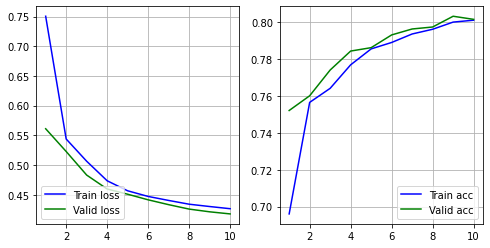

In [26]:
plot_train_valid_history(history)

In [29]:
score, acc = model.evaluate(X_test, y_test)
print('Test score:', score)
print('Test accuracy: {:.1f}%'.format(100*acc))

204/204 [==============================] - 0s 1ms/step - loss: 0.4165 - accuracy: 0.8084
Test score: 0.4165398180484772
Test accuracy: 80.8%


## Task 1
Create, train and test a model with following parameters:
- First hidden layer: 32 neurons, relu activation
- Dropout after first hidden layer keep_probability = 0.5
- Second hidden layer: 32 neurons, relu activation
- Output layer: 1 neuron, sigmoid activation

Training parameters:
- Learning Rate: 0.0003
- Number of Epochs: 50
- Batch size: 128

*Note: You will need your model in task 2, so it is a good idea to write a function, which creates the model.*

![alt text](./img/model_keras_task1.png "Task 1 model")

In [31]:
# HYPERPARAMETERS
# ENTER YOUR CODE HERE
cell_1 = 32
cell_2 = 32

lr = 0.0003
epochs = 50
batch_size = 128

input = X_train.shape[1]
input

23

In [32]:
def create_model():
    # ENTER YOUR CODE HERE
    model = Sequential()

    model.add(Dense(cell_1, input_shape=[input, ], activation='relu'))
    model.add(Dropout(rate=0.5))
    model.add(Dense(cell_2, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    optimizer = optimizers.Adam(lr=LEARNING_RATE)

    model.compile(loss = 'binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model


In [33]:
model = create_model()

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [34]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 32)                768       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_7 (Dense)             (None, 32)                1056      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,857
Trainable params: 1,857
Non-trainable params: 0
_________________________________________________________________


Epoch 1/50
153/153 [==============================] - 0s 3ms/step - loss: 0.4079 - accuracy: 0.8097 - val_loss: 0.5679 - val_accuracy: 0.7592
Epoch 2/50
153/153 [==============================] - 0s 3ms/step - loss: 0.4073 - accuracy: 0.8108 - val_loss: 0.5955 - val_accuracy: 0.7592
Epoch 3/50
153/153 [==============================] - 0s 3ms/step - loss: 0.4064 - accuracy: 0.8077 - val_loss: 0.5815 - val_accuracy: 0.7592
Epoch 4/50
153/153 [==============================] - 0s 3ms/step - loss: 0.4083 - accuracy: 0.8084 - val_loss: 0.6017 - val_accuracy: 0.7592
Epoch 5/50
153/153 [==============================] - 0s 3ms/step - loss: 0.4067 - accuracy: 0.8111 - val_loss: 0.6417 - val_accuracy: 0.7592
Epoch 6/50
153/153 [==============================] - 0s 3ms/step - loss: 0.4064 - accuracy: 0.8100 - val_loss: 0.6214 - val_accuracy: 0.7592
Epoch 7/50
153/153 [==============================] - 0s 3ms/step - loss: 0.4063 - accuracy: 0.8116 - val_loss: 0.5960 - val_accuracy: 0.7592
Epoch 

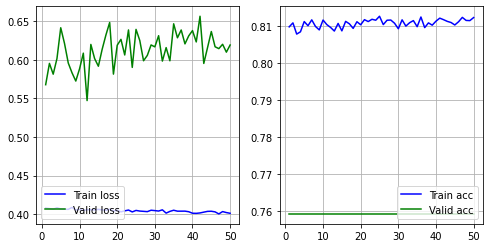

204/204 [==============================] - 0s 2ms/step - loss: 0.6231 - accuracy: 0.7591
Test score: 0.6230530738830566
Test accuracy: 75.9%


In [37]:
# ENTER YOUR CODE HERE
history = model.fit(X_train, y_train, 
    validation_data = (X_valid, y_valid),
    batch_size = batch_size,
    epochs = epochs)

plot_train_valid_history(history)

score, acc = model.evaluate(X_test, y_test)
print('Test score:', score)
print('Test accuracy: {:.1f}%'.format(100*acc))


## Question 1
- How does the model behave. Can you see any overfitting or undergitting problems?
- How you can prevent these problems?

## Task 2
Normalize your features. Use StandardScaler from sklearn.preprocessing library. Then train your model on the normalized features. Did it change anything with the behaviour of the model?

In [41]:
from sklearn.preprocessing import StandardScaler
# ENTER YOUR CODE HERE
scaler = StandardScaler()

In [43]:
# Create and train the model
# ENTER YOUR CODE HERE
X_train_norm = scaler.fit_transform(X_train)
X_valid_norm = scaler.transform(X_valid)
X_test_norm = scaler.transform(X_test)


In [44]:
model = create_model()
history = model.fit(X_train_norm, y_train,
          validation_data = (X_valid_norm, y_valid),
          batch_size = batch_size,
          epochs = epochs)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


153/153 [==============================] - 2s 6ms/step - loss: 0.4960 - accuracy: 0.7607 - val_loss: 0.4239 - val_accuracy: 0.8088
Epoch 2/50
153/153 [==============================] - 1s 5ms/step - loss: 0.4439 - accuracy: 0.7876 - val_loss: 0.4064 - val_accuracy: 0.8214
Epoch 3/50
153/153 [==============================] - 1s 5ms/step - loss: 0.4307 - accuracy: 0.7952 - val_loss: 0.4001 - val_accuracy: 0.8209
Epoch 4/50
153/153 [==============================] - 1s 5ms/step - loss: 0.4230 - accuracy: 0.8022 - val_loss: 0.3956 - val_accuracy: 0.8219
Epoch 5/50
153/153 [==============================] - 1s 6ms/step - loss: 0.4216 - accuracy: 0.8020 - val_loss: 0.3957 - val_accuracy: 0.8229
Epoch 6/50
153/153 [==============================] - 1s 5ms/step - loss: 0.4151 - accuracy: 0.8077 - val_loss: 0.3938 - val_accuracy: 0.8220
Epoch 7/50
153/153 [==============================] - 1s 5ms/step - loss: 0.4170 - accuracy: 0.8050 - val_loss: 0.3934 - val_accuracy: 0.8228
Epoch 8/50
153/15

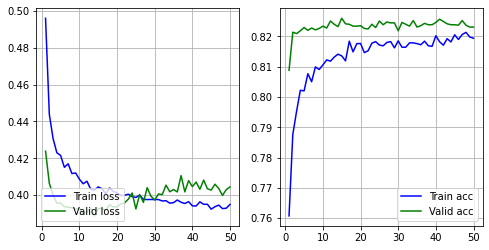

In [45]:
plot_train_valid_history(history)

In [47]:
score, acc = model.evaluate(X_test_norm, y_test)
print(f'Test score:{score}')
print(f'Test score:{100*acc:.2f}%')

204/204 [==============================] - 1s 3ms/step - loss: 0.4086 - accuracy: 0.8217
Test score:0.40864071249961853
Test score:82.17%
